> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate Movies Data Set

## Table of Contents
<ul>
    <li><a href="#intro">Introduction</a></li>
    <li><a href="#wrangling">Data Wrangling</a></li>
    <li><a href="#eda">Exploratory Data Analysis</a></li>
    <li><a href="#conclusions">Conclusions</a></li>
    <li><a href="#Limitations">Limitations</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this analyses i will investigate a movies data set to clearify some views and answer questions.



In [2]:
# Use this cell to set up import statements for all of the packages that you
# plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



<a id='wrangling'></a>
## Data Wrangling


In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
df.shape

(10866, 21)

In [5]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [7]:
#to show columns data types
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [8]:
# corricting data types
df['release_date'] = pd.to_datetime(df['release_date'])


### Data Cleaning

In [9]:
#checking for null values
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [10]:
#viewing all columns to check witch to drop
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [11]:
#dropping unwanted columns
df.drop(['id','cast','imdb_id','homepage','tagline','overview','keywords','production_companies'], axis = 1, inplace = True)
df.head()

,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


In [12]:
#dropping rows with null values
df = df.dropna()
df.isnull().sum()

popularity        0
budget            0
revenue           0
original_title    0
director          0
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

In [13]:
#checking for duplication
df.duplicated().sum()

1

In [14]:
#deleting duplicates
df.drop_duplicates(inplace = True)
df.duplicated().sum()

0

In [15]:
#Adding profit column witch shows how much the movie have made
df['profit']=df['revenue']-df['budget']
df[['original_title','profit']].head()

,original_title,profit
0,Jurassic World,1363528810
1,Mad Max: Fury Road,228436354
2,Insurgent,185238201
3,Star Wars: The Force Awakens,1868178225
4,Furious 7,1316249360


In [16]:
# method that return dataset with splitted values of specefic column that contain multi values
def splitter(column):
    df_split_column = df.copy()
    split_column = df_split_column[column].str.split('|').apply(pd.Series,1).stack().reset_index(level=1, drop=True)
    split_column.name = column+'_split'
    return df_split_column.drop([column], axis=1).join(split_column)

In [17]:
# initiating splitted_genre dataset witch equles to df but with splitted genres
splitted_genre = splitter('genres')
splitted_genre.head()

,popularity,budget,revenue,original_title,director,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,genres_split
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810,Action
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810,Adventure
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810,Science Fiction
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810,Thriller
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,228436354,Action


In [21]:
splitted_genre[splitted_genre['original_title']=='Jurassic World']

,popularity,budget,revenue,original_title,director,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,genres_split
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810,Action
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810,Adventure
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810,Science Fiction
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810,Thriller


In [20]:
# initiating splitted_director dataset witch equles to df but with splitted directors.

splitted_director=splitter('director')
splitted_director.head()

,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,director_split
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810,Colin Trevorrow
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,228436354,George Miller
2,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,185238201,Robert Schwentke
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,1868178225,J.J. Abrams
4,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,1316249360,James Wan


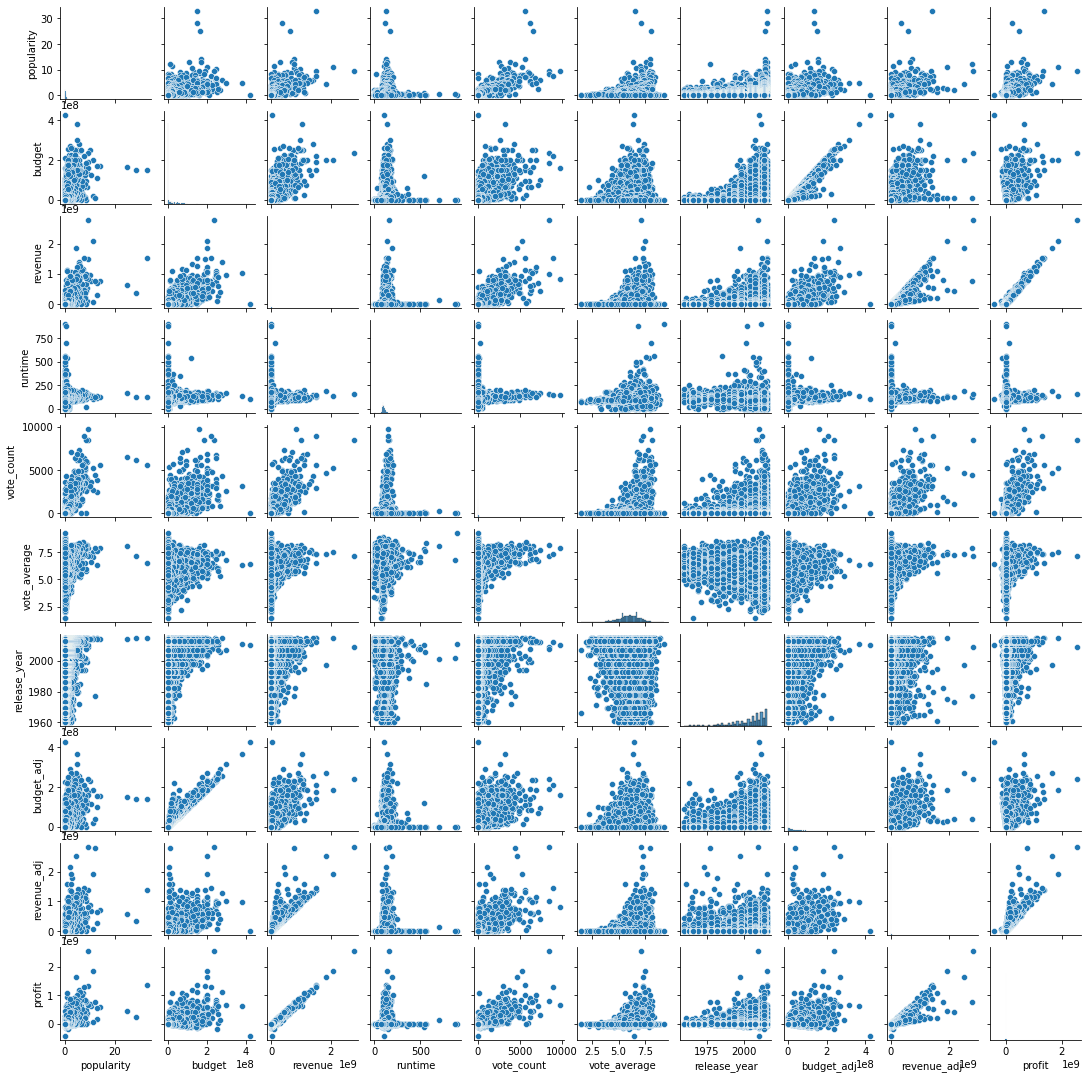

In [19]:
# comparing all the columns with eachother
sns.pairplot(df).fig.set_size_inches(15,15)

### from the above charts we can tell to many things about the data set


## Question 1: what is the Genres trends?


In [33]:
# answering the above Question by calculating how many movies in each genre
splitted_genre['genres_split'].value_counts()

Drama              4754
Comedy             3782
Thriller           2904
Action             2378
Romance            1708
Horror             1636
Adventure          1466
Crime              1353
Family             1223
Science Fiction    1223
Fantasy             912
Mystery             809
Animation           692
Documentary         509
Music               402
History             332
War                 270
Foreign             185
Western             164
TV Movie            162
Name: genres_split, dtype: int64

The trend by percentage

In [32]:
# answering the above Question by calculating genres shares by percentage
splitted_genre['genres_split'].value_counts()/splitted_genre['genres_split'].value_counts().sum()*100

Drama              17.696546
Comedy             14.078320
Thriller           10.810006
Action              8.851995
Romance             6.357951
Horror              6.089934
Adventure           5.457117
Crime               5.036480
Family              4.552561
Science Fiction     4.552561
Fantasy             3.394878
Mystery             3.011465
Animation           2.575938
Documentary         1.894729
Music               1.496426
History             1.235855
War                 1.005063
Foreign             0.688654
Western             0.610482
TV Movie            0.603038
Name: genres_split, dtype: float64

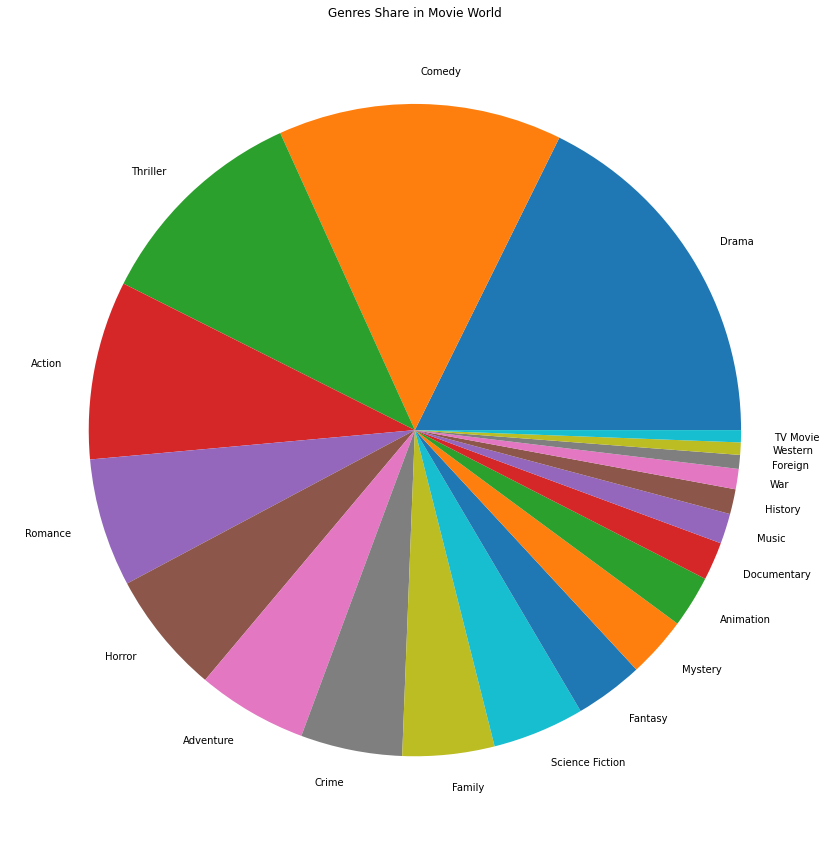

In [21]:
# showing genres share in pie plot
splitted_genre['genres_split'].value_counts().plot(kind='pie',figsize=(15,15));
plt.ylabel('');
plt.title('Genres Share in Movie World');

#### from the previos information we conclude that the most repeated genre is Drama folowed by Comedy, Thriller, Action then Romance, with a large share more than 50% 

## Question 2: Which genre has highest profit and lowest ?

### Top 5 genres with highest profit

In [22]:
# answering the above Question by showing Top 5 genres with highest profit
splitted_genre.groupby('genres_split')['profit'].mean().sort_values(ascending=False).head()

genres_split
Adventure          7.585199e+07
Fantasy            6.398594e+07
Animation          5.262327e+07
Family             4.940159e+07
Science Fiction    4.538947e+07
Name: profit, dtype: float64

### Top 5 genres with lowest profit

In [23]:
# answering the above Question by showing Top 5 genres with lowest profit
splitted_genre.groupby('genres_split')['profit'].mean().sort_values().head()

genres_split
TV Movie      -1.666667e+04
Foreign        5.084694e+04
Documentary    1.495890e+06
Western        9.653105e+06
Horror         1.060276e+07
Name: profit, dtype: float64

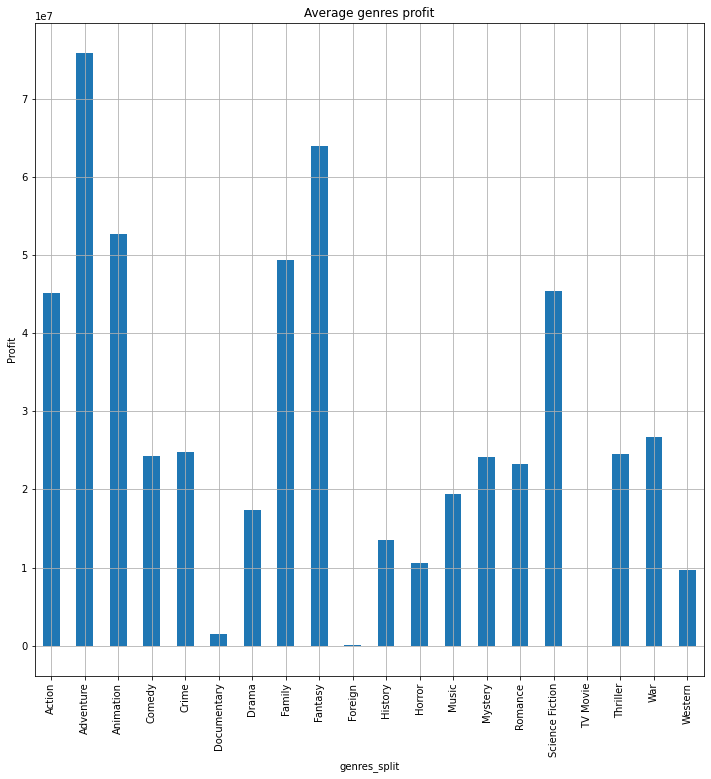

In [24]:
# graphing genres average profit
splitted_genre.groupby('genres_split')['profit'].mean().plot.bar(grid=True,figsize=(12,12));
plt.ylabel('Profit');
plt.title('Average genres profit');

## Question 3: What is Top 5 vote average movies?

In [25]:
# answering the above Question by showing Top 5 movie ratting
df.sort_values(by='vote_average',ascending=False)[['original_title','vote_average']].head()

,original_title,vote_average
3894,The Story of Film: An Odyssey,9.2
538,The Mask You Live In,8.9
1200,Black Mirror: White Christmas,8.8
2269,Life Cycles,8.8
6911,Pink Floyd: Pulse,8.7




## Question 4:  Who is the most profit making directors?

In [26]:
# answering the above Question by calculating most profit making directors
splitted_director.groupby('director_split')['profit'].mean().sort_values(ascending=False).head()

director_split
Pierre Coffin       8.173356e+08
Colin Trevorrow     6.833933e+08
David Yates         6.758591e+08
Lee Unkrich         6.191573e+08
Robert Stromberg    5.784104e+08
Name: profit, dtype: float64

## Question 5: what are the movies that 'Pierre Coffin' directed?

In [27]:
# answering the above Question by showing 'Pierre Coffin' works
splitted_director.query('director_split=="Pierre Coffin"')[['original_title','profit']]

,original_title,profit
8,Minions,1082730962
1924,Despicable Me,474513985
5434,Despicable Me 2,894761885


## Question 6: Which year has the highest number of movie released ?

In [24]:
# answering the above Question by calculating Top 5 years with highest movie produced
df.groupby('release_year')['original_title'].count().sort_values(ascending=False).head()

release_year
2014    694
2013    652
2015    624
2012    581
2011    539
Name: original_title, dtype: int64

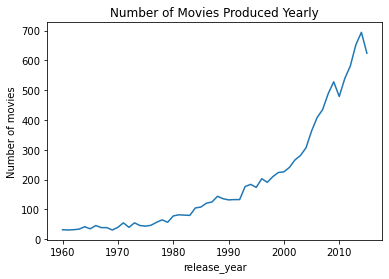

In [29]:
# graphing number of movies produced yearly
df.groupby('release_year')['original_title'].count().plot();
plt.ylabel('Number of movies');
plt.title('Number of Movies Produced Yearly');

### 2014 came in the first place in highest number of movies released in one year with 694 movies

## Question 7: Does vote count affected by time? Why?

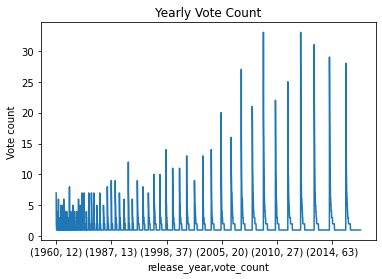

In [30]:
# answering the above Question by graphing yearly vote count
df.groupby('release_year')['vote_count'].value_counts().plot();
plt.ylabel('Vote count');
plt.title('Yearly Vote Count');

### Yes it affected the vote count. From my point of view, I think it is because by the days voting bacomes easeier and accesing movies also.

<a id='conclusions'></a>
## Conclusions

<p>From previos answers we concluded alot information:</p>
<h3>Question 1: what is the Genres trends?</h3>
<p>The top 3 Genres are:</p>
<ol>
    <li><a>Drama        with      17.70%</a></li>
    <li><a>Comedy       with      14.08%</a></li>
    <li><a>Thriller     with      10.81%</a></li>
</ol>

<h3>Question 2: Which genre has highest profit and lowest?</h3>

<p>The top 5 highest profit genres:</p>
<ol>
    <li><a>Adventure</a></li>
    <li><a>Fantasy</a></li>
    <li><a>Animation</a></li>
    <li><a>Family</a></li>
    <li><a>Science Fiction</a></li>
</ol>
<p>The top 5 lowest profit genres:</p>
<ol>
    <li><a>TV Movie</a></li>
    <li><a>Foreign</a></li>
    <li><a>Documentary</a></li>
    <li><a>Western</a></li>
    <li><a>Horror</a></li>
</ol>

<h3>Question 3: What is Top 5 vote average movies?</h3>

<p>Top 5 vote average movies are:</p>
<ol>
    <li><a>The Story of Film: An Odyssey        with         9.2</a></li>
    <li><a>The Mask You Live In	             with         8.9</a></li>
    <li><a>Black Mirror: White Christmas	     with         8.8</a></li>
    <li><a>Life Cycles	                         with         8.8</a></li>
    <li><a>Pink Floyd: Pulse	                 with         8.7</a></li>
</ol>

<h3>Question 4: Who is the most profit making directors?</h3>

<p>Top 5 money making directors are:</p>
<ol>
<li><a>Pierre Coffin</a></li>
<li><a>Colin Trevorrow</a></li>
<li><a>David Yates</a></li>
<li><a>Lee Unkrich</a></li>
<li><a>Robert Stromberg</a></li>
</ol>

<h3>Question 5: what are the movies that 'Pierre Coffin' directed?</h3>

<p>Pierre Coffin directed 3 movies witch are:</p>
<ul>
    <li><a>Minions	            1082730962</a></li>
    <li><a>Despicable Me        474513985</a></li>
    <li><a>Despicable Me 2	    894761885</a></li>
</ul>

<h3>Question 6: Which year has the highest number of movie released?</h3>

<p>Top 5 years with highest number of movies are:</p>
<ol>
<li><a>2014    694</a></li>
<li><a>2013    652</a></li>
<li><a>2015    624</a></li>
<li><a>2012    581</a></li>
<li><a>2011    539</a></li>
</ol>
<p>2014 came in the first place in highest number of movies released in one year with 694 movies.</p>

<h3>Question 7: Does vote count affected by time? Why?</h3>

<p>Yes it affected the vote count. from my point of view, I think it is because by the days voting bacomes easeier and accesing movies also.</p>

<a id='Limitations'></a>
## Limitations

>#### Personal limitation
>> I'm a student and i have exams in these days so I had to delay my project submition untel finish the exsams.

>#### Project limitation
>> I had alot of thim due to my passion to master the work between my hands, I had a lot of ideas i wanted to implict but I'm short on Python knoledge so, I had to search and stody new alogrithem to surpass these limitations.

In [31]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1